<a href="https://colab.research.google.com/github/mbrady4/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/DS_Unit_1_Sprint_Challenge_2_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling

In this Sprint Challenge you will use data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the Sprint Challenge!
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html]) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

## Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

In [0]:
import numpy as np

In [62]:
cell_phones.shape, population.shape, geo_country_codes.shape

((9215, 3), (59297, 3), (273, 33))

In [63]:
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [64]:
population.head(5)

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [65]:
geo_country_codes.head()

,geo,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,...,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,nan,nan,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,...,12.5,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,...,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,...,-12.5,18.5,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.21667,-63.05,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


## Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [66]:
merged = pd.merge(cell_phones, population, how='inner', on=['geo', 'time'])
merged.shape

(8590, 4)

Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [67]:
merged = pd.merge(merged, geo_country_codes[ ['geo', 'country'] ], on='geo')
merged.shape

(8590, 5)

In [68]:
merged.head()

,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996351,Afghanistan
1,afg,1965,0.0,9938414,Afghanistan
2,afg,1970,0.0,11126123,Afghanistan
3,afg,1975,0.0,12590286,Afghanistan
4,afg,1976,0.0,12840299,Afghanistan


## Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [0]:
merged['cell_phones_per_person'] = (merged['cell_phones_total'] / merged['population_total'])

In [70]:
merged.head()

,geo,time,cell_phones_total,population_total,country,cell_phones_per_person
0,afg,1960,0.0,8996351,Afghanistan,0.0
1,afg,1965,0.0,9938414,Afghanistan,0.0
2,afg,1970,0.0,11126123,Afghanistan,0.0
3,afg,1975,0.0,12590286,Afghanistan,0.0
4,afg,1976,0.0,12840299,Afghanistan,0.0


In [71]:
merged[ (merged['country'] == 'United States') & (merged['time'] == 2017) ]

,geo,time,cell_phones_total,population_total,country,cell_phones_per_person
8134,usa,2017,"395,881,000.0",324459463,United States,1.2201246847283354


Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [0]:
merged['geo'] = [ x.upper() for x in merged['geo'] ]

In [73]:
merged.head()

,geo,time,cell_phones_total,population_total,country,cell_phones_per_person
0,AFG,1960,0.0,8996351,Afghanistan,0.0
1,AFG,1965,0.0,9938414,Afghanistan,0.0
2,AFG,1970,0.0,11126123,Afghanistan,0.0
3,AFG,1975,0.0,12590286,Afghanistan,0.0
4,AFG,1976,0.0,12840299,Afghanistan,0.0


## Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [74]:
#Describe Numeric Columns
merged.describe()

,time,cell_phones_total,population_total,cell_phones_per_person
count,"8,590.0","8,590.0","8,590.0","8,590.0"
mean,"1,994.1934807916182","9,004,949.642905472","29,838,230.581722934",0.2796385558059151
std,14.257974607310302,"55,734,084.872179635","116,128,377.47477299",0.454246656214052
min,"1,960.0",0.0,"4,433.0",0.0
25%,"1,983.0",0.0,"1,456,148.0",0.0
50%,"1,995.0","6,200.0","5,725,062.5",0.0015636266438163813
75%,"2,006.0","1,697,652.0","18,105,812.0",0.4611491855201403
max,"2,017.0","1,474,097,000.0","1,409,517,397.0",2.490242818521353


In [75]:
#Describe Non-Numeric Columns
merged.describe(exclude='number')

,geo,country
count,8590,8590
unique,195,195
top,URY,Senegal
freq,46,46


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [0]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format

In [85]:
merged.groupby('country')['cell_phones_total'].aggregate(np.max).sort_values(ascending=False)[:5]

country
China           1,474,097,000.0
India           1,168,902,277.0
Indonesia         458,923,202.0
United States     395,881,000.0
Brazil            280,728,796.0
Name: cell_phones_total, dtype: float64

My fifth population total differs from the table, thus I did the below groupby to ensure verify that my table was pulling from 2017 totals. 

In [80]:
merged.groupby('country', as_index=False).aggregate(np.max).sort_values(by=['time', 'cell_phones_total', 'country'], ascending=False)[:5]

,country,geo,time,cell_phones_total,population_total,cell_phones_per_person
35,China,CHN,2017,"1,474,097,000.0",1409517397,1.0458168186766978
76,India,IND,2017,"1,168,902,277.0",1339180127,0.8728491809526382
77,Indonesia,IDN,2017,"458,923,202.0",263991379,1.738402230172827
186,United States,USA,2017,"395,881,000.0",324459463,1.228758722948959
23,Brazil,BRA,2017,"280,728,796.0",209288278,1.3746853195773652


2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [78]:
merged[ merged['country'] == 'United States' ]

,geo,time,cell_phones_total,population_total,country,cell_phones_per_person
8092,USA,1960,0.0,186808228,United States,0.0
8093,USA,1965,0.0,199815540,United States,0.0
8094,USA,1970,0.0,209588150,United States,0.0
8095,USA,1975,0.0,219205296,United States,0.0
8096,USA,1976,0.0,221239215,United States,0.0
8097,USA,1977,0.0,223324042,United States,0.0
8098,USA,1978,0.0,225449657,United States,0.0
8099,USA,1979,0.0,227599878,United States,0.0
8100,USA,1980,0.0,229763052,United States,0.0
8101,USA,1984,"91,600.0",238573861,United States,0.0003839481811462992


2014 was the first year that the United States had more cell phones than people. 

## Part 4. Reshape data

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

In [112]:
merged.head()

,geo,time,cell_phones_total,population_total,country,cell_phones_per_person
0,AFG,1960,0.0,8996351,Afghanistan,0.0
1,AFG,1965,0.0,9938414,Afghanistan,0.0
2,AFG,1970,0.0,11126123,Afghanistan,0.0
3,AFG,1975,0.0,12590286,Afghanistan,0.0
4,AFG,1976,0.0,12840299,Afghanistan,0.0


In [123]:
countries = ['China', 'United States', 'Indonesia', 'Brazil']
time = merged[ merged['time'] > 2006]

def in_countries(x):
  if str(x) in countries:
    return True
  else:
    return False

subset = (merged[( (merged['country'] == 'United States') |
                   (merged['country'] == 'China') |
                   (merged['country'] == 'India') |
                   (merged['country'] == 'Indonesia') |
                   (merged['country'] == 'Brazil') ) &
                   (merged['time'] > 2006)
               ])

merged_pivot = subset.pivot(columns='time', index='country', values='cell_phones_total')
merged_pivot

time,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,
Brazil,"120,980,103.0","150,641,403.0","169,385,584.0","196,929,978.0","234,357,507.0","248,323,703.0","271,099,799.0","280,728,796.0","257,814,274.0","244,067,356.0","236,488,548.0"
China,"547,306,000.0","641,245,000.0","747,214,000.0","859,003,000.0","986,253,000.0","1,112,155,000.0","1,229,113,000.0","1,286,093,000.0","1,291,984,200.0","1,364,934,000.0","1,474,097,000.0"
India,"233,620,000.0","346,890,000.0","525,090,000.0","752,190,000.0","893,862,478.0","864,720,917.0","886,304,245.0","944,008,677.0","1,001,056,000.0","1,127,809,000.0","1,168,902,277.0"
Indonesia,"93,386,881.0","140,578,243.0","163,676,961.0","211,290,235.0","249,805,619.0","281,963,665.0","313,226,914.0","325,582,819.0","338,948,340.0","385,573,398.0","458,923,202.0"
United States,"249,300,000.0","261,300,000.0","274,283,000.0","285,118,000.0","297,404,000.0","304,838,000.0","310,698,000.0","355,500,000.0","382,307,000.0","395,881,000.0","395,881,000.0"


In [124]:
merged_pivot.shape

(5, 11)

#### OPTIONAL BONUS QUESTION!

Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

In [125]:
merged_pivot.head()

time,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,
Brazil,"120,980,103.0","150,641,403.0","169,385,584.0","196,929,978.0","234,357,507.0","248,323,703.0","271,099,799.0","280,728,796.0","257,814,274.0","244,067,356.0","236,488,548.0"
China,"547,306,000.0","641,245,000.0","747,214,000.0","859,003,000.0","986,253,000.0","1,112,155,000.0","1,229,113,000.0","1,286,093,000.0","1,291,984,200.0","1,364,934,000.0","1,474,097,000.0"
India,"233,620,000.0","346,890,000.0","525,090,000.0","752,190,000.0","893,862,478.0","864,720,917.0","886,304,245.0","944,008,677.0","1,001,056,000.0","1,127,809,000.0","1,168,902,277.0"
Indonesia,"93,386,881.0","140,578,243.0","163,676,961.0","211,290,235.0","249,805,619.0","281,963,665.0","313,226,914.0","325,582,819.0","338,948,340.0","385,573,398.0","458,923,202.0"
United States,"249,300,000.0","261,300,000.0","274,283,000.0","285,118,000.0","297,404,000.0","304,838,000.0","310,698,000.0","355,500,000.0","382,307,000.0","395,881,000.0","395,881,000.0"


In [128]:
( merged_pivot[2017] - merged_pivot[2007]).sort_values(ascending=False)

country
India           935,282,277.0
China           926,791,000.0
Indonesia       365,536,321.0
United States   146,581,000.0
Brazil          115,508,445.0
dtype: float64

India had the biggest increase in cell phones from 2007 to 2017, with a net addition of 935,282,277 cell phones.

If you have the time and curiosity, what other questions can you ask and answer with this data?

# Extra Analysis

Goal: Visualize cell phones per person by world region over time

In [0]:
import matplotlib.pyplot as plt

In [129]:
cell_phones.columns.tolist()

['geo', 'time', 'cell_phones_total']

In [130]:
population.columns.tolist()

['geo', 'time', 'population_total']

In [131]:
geo_country_codes.columns.tolist()

['geo',
 'alt_5',
 'alternative_1',
 'alternative_2',
 'alternative_3',
 'alternative_4_cdiac',
 'arb1',
 'arb2',
 'arb3',
 'arb4',
 'arb5',
 'arb6',
 'g77_and_oecd_countries',
 'gapminder_list',
 'god_id',
 'gwid',
 'income_groups',
 'is--country',
 'iso3166_1_alpha2',
 'iso3166_1_alpha3',
 'iso3166_1_numeric',
 'iso3166_2',
 'landlocked',
 'latitude',
 'longitude',
 'main_religion_2008',
 'country',
 'pandg',
 'un_state',
 'unicode_region_subtag',
 'upper_case_name',
 'world_4region',
 'world_6region']

In [0]:
world = pd.merge(cell_phones, population, how='inner', on=['geo', 'time'])

In [134]:
world.shape

(8590, 4)

In [0]:
world = pd.merge(world, geo_country_codes[ ['geo', 'world_6region'] ] )

In [136]:
world.head()

,geo,time,cell_phones_total,population_total,world_6region
0,afg,1960,0.0,8996351,south_asia
1,afg,1965,0.0,9938414,south_asia
2,afg,1970,0.0,11126123,south_asia
3,afg,1975,0.0,12590286,south_asia
4,afg,1976,0.0,12840299,south_asia


In [0]:
world['cell_phones_per_person'] = ( world['cell_phones_total'] / world['population_total'] )

In [139]:
world.head()

,geo,time,cell_phones_total,population_total,world_6region,cell_phones_per_person
0,afg,1960,0.0,8996351,south_asia,0.0
1,afg,1965,0.0,9938414,south_asia,0.0
2,afg,1970,0.0,11126123,south_asia,0.0
3,afg,1975,0.0,12590286,south_asia,0.0
4,afg,1976,0.0,12840299,south_asia,0.0


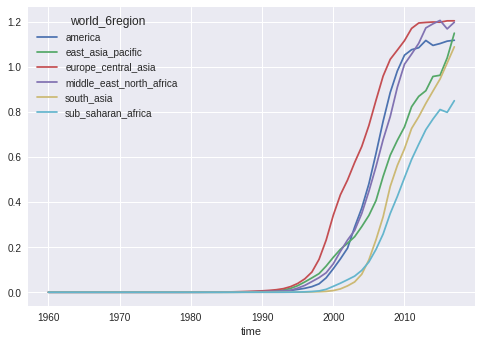

In [166]:
pd.pivot_table(data=world, index='time', columns='world_6region', values='cell_phones_per_person').plot()

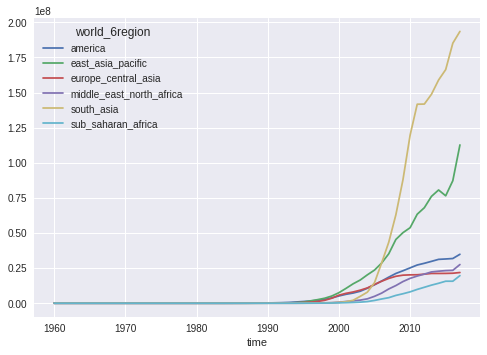

In [165]:
pd.pivot_table(data=world, index='time', columns='world_6region', values='cell_phones_total').plot()

## Explore how the growth rate in cell phones has changed over time by region

In [167]:
world.head()

,geo,time,cell_phones_total,population_total,world_6region,cell_phones_per_person
0,afg,1960,0.0,8996351,south_asia,0.0
1,afg,1965,0.0,9938414,south_asia,0.0
2,afg,1970,0.0,11126123,south_asia,0.0
3,afg,1975,0.0,12590286,south_asia,0.0
4,afg,1976,0.0,12840299,south_asia,0.0


In [0]:
regions = pd.pivot_table(data=world, index='time', columns='world_6region', values='cell_phones_total')

In [173]:
regions.head()

world_6region,america,east_asia_pacific,europe_central_asia,middle_east_north_africa,south_asia,sub_saharan_africa
time,,,,,,
1960,0.0,0.0,0.0,0.0,0.0,0.0
1965,0.0,0.0,0.0,0.0,0.0,0.0
1970,0.0,0.0,0.0,0.0,0.0,0.0
1975,0.0,0.0,0.0,0.0,0.0,0.0
1976,0.0,0.0,0.0,0.0,0.0,0.0


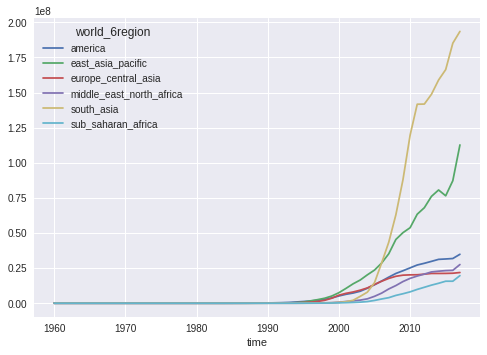

In [184]:
regions.pct_change(fill_method='bfill')
regions.fillna(0)

regions.plot()